<a href="https://colab.research.google.com/github/Purity-E/ML_zoomcamp/blob/main/Copy_of_02_carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Question1

In [2]:
np.__version__

'1.19.5'

Question2

In [3]:
pd.__version__

'1.1.5'

Question3

In [5]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2021-09-11 18:07:28--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2021-09-11 18:07:29 (25.3 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [6]:
df = pd.read_csv('data.csv')
len(df)

11914

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory data analysis

In [10]:
# mean price of the cars of make bmw
df_bmw = df[df.make == 'bmw']
df_bmw['msrp'].mean()

61546.76347305389

Question 4

In [11]:
# creating subset of cars year>=2015
df_2015=df[df.year >= 2015]
# missing values for engine_hp
df_2015['engine_hp'].isna().sum()

51

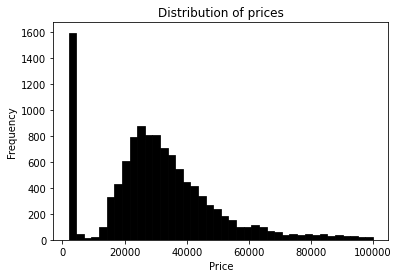

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

Question5

In [13]:
# avarage of engine hp
mean_hp_before = df[['engine_hp']].mean()
print(round(mean_hp_before))
#filling missing values with mean
df[['engine_hp']].fillna(mean_hp_before)
#calculate avarage again
mean_hp_after = df[['engine_hp']].mean()
print(round(mean_hp_after))

engine_hp    249.0
dtype: float64
engine_hp    249.0
dtype: float64


Question6

In [14]:
#selecting the rolls royce cars
rr_cars = df[df.make == 'rolls-royce' ]
# selecting columns
rr_cars = rr_cars[['engine_hp',	'engine_cylinders', 'highway_mpg']]
# dropping duplicates
rr_cars.drop_duplicates(keep='first', inplace=True)

In [15]:
rr_cars.shape

(7, 3)

In [17]:
# getting numpy array
X = np.array(rr_cars)

In [37]:
#multiplication
XTX = X.T.dot(X)
print(XTX)

[[1.754801e+06 3.965600e+04 6.519600e+04]
 [3.965600e+04 9.280000e+02 1.500000e+03]
 [6.519600e+04 1.500000e+03 2.454000e+03]]


In [38]:
# inverse
inverse = np.linalg.inv(XTX)
print(inverse)

[[ 5.17815728e-05  9.06587044e-04 -1.92984188e-03]
 [ 9.06587044e-04  1.05723058e-01 -8.87084092e-02]
 [-1.92984188e-03 -8.87084092e-02  1.05900809e-01]]


In [39]:
# sum of elements
sum = np.sum(inverse)
print(sum)

0.032212320677486125


Question 7

In [41]:
# creating an array
y = np.array([1000, 1100, 900, 1200, 1000, 850, 1300])
W = XTX = inverse.dot(X.T)
matrix_vector_multiplication(W, y)

array([ 0.19989598, 31.02612262, 31.65378877])